In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import os

In [2]:
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
os.chdir('..')

In [4]:
df = pd.read_csv('data/heart_disease_uci.csv', index_col=0)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


Examine the missingness of data

<Axes: >

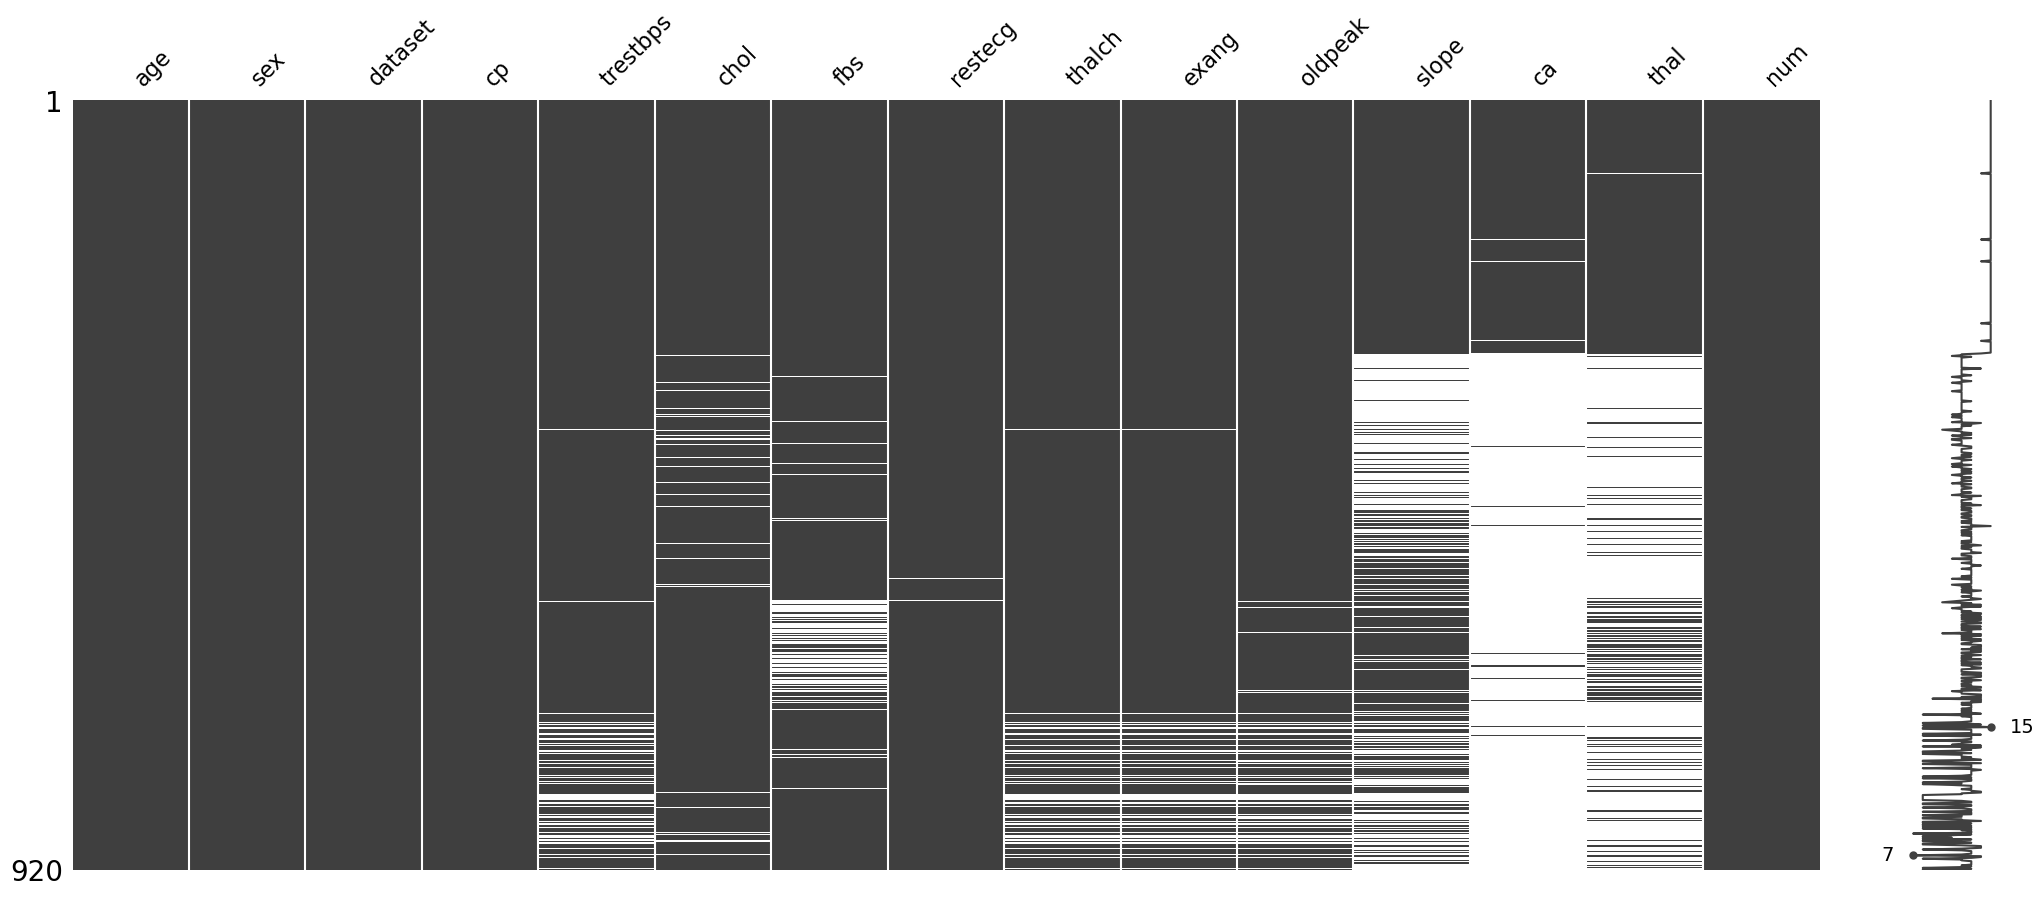

In [5]:
# visualize the missing values
msno.matrix(df)

In [6]:
df[df['thalch'].isna()]['dataset'].value_counts()

dataset
VA Long Beach    53
Hungary           1
Switzerland       1
Name: count, dtype: int64

In [7]:
df[~df['thalch'].isna()]['dataset'].value_counts()

dataset
Cleveland        304
Hungary          292
VA Long Beach    147
Switzerland      122
Name: count, dtype: int64

Fit an SVM model first to see how useful are `slope`, `ca` and `thal`.

In [8]:
df_clean = df.drop(['slope', 'ca', 'thal'], axis=1)
df_clean.dropna(inplace=True)
df_clean

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
id,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,1
915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,2
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1


In [9]:
df.dtypes

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [10]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [11]:
categorical_columns = [i for i in df_clean.columns if df_clean[i].dtype == 'object']
numerical_columns = [i for i in df_clean.columns if df_clean[i].dtype != 'object']
print(categorical_columns, numerical_columns)

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang'] ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']


First look at the pairwise relationship between different features.

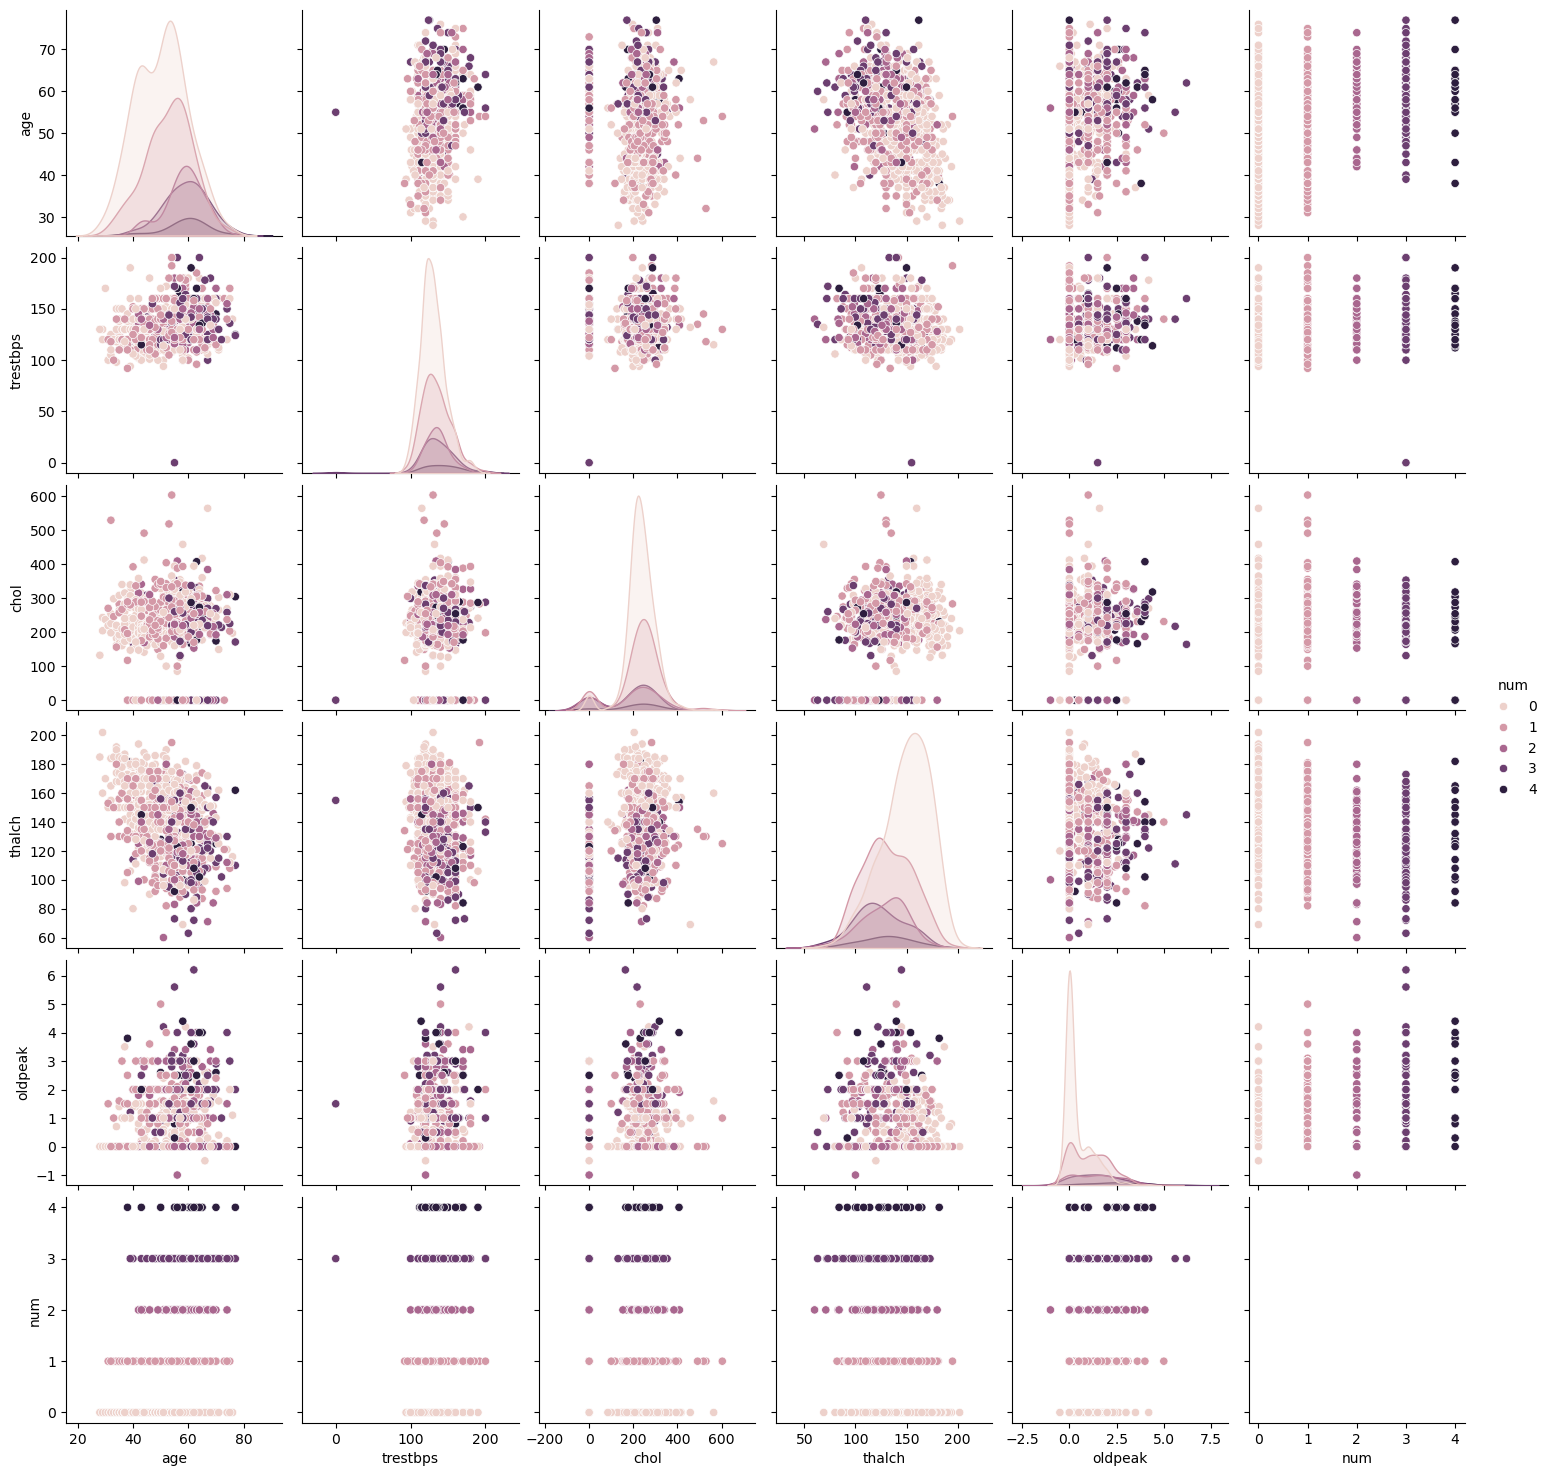

In [12]:
sns.pairplot(df_clean, vars=numerical_columns, hue='num')

In [13]:
df_clean_scaled = df_clean.copy()
scaler = StandardScaler()
df_clean_scaled[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])
df_clean_scaled.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02
mean,2.016405e-16,1.248251e-16,-5.761157e-17,2.688540e-16,-4.800964e-17,-1.920386e-17
std,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00
min,-2.669423e+00,-7.149349e+00,-2.353110e+00,-3.048735e+00,-1.743631e+00,-8.193503e-01
25%,-7.548897e-01,-6.868580e-01,-2.473134e-01,-7.257298e-01,-8.231810e-01,-8.193503e-01
50%,9.601415e-02,-1.483171e-01,1.161236e-01,4.860522e-02,-3.629559e-01,6.708131e-02
75%,7.341920e-01,3.902239e-01,5.436966e-01,7.939027e-01,5.574943e-01,6.708131e-02
max,2.542363e+00,3.621469e+00,4.092552e+00,2.449044e+00,4.883610e+00,2.726376e+00


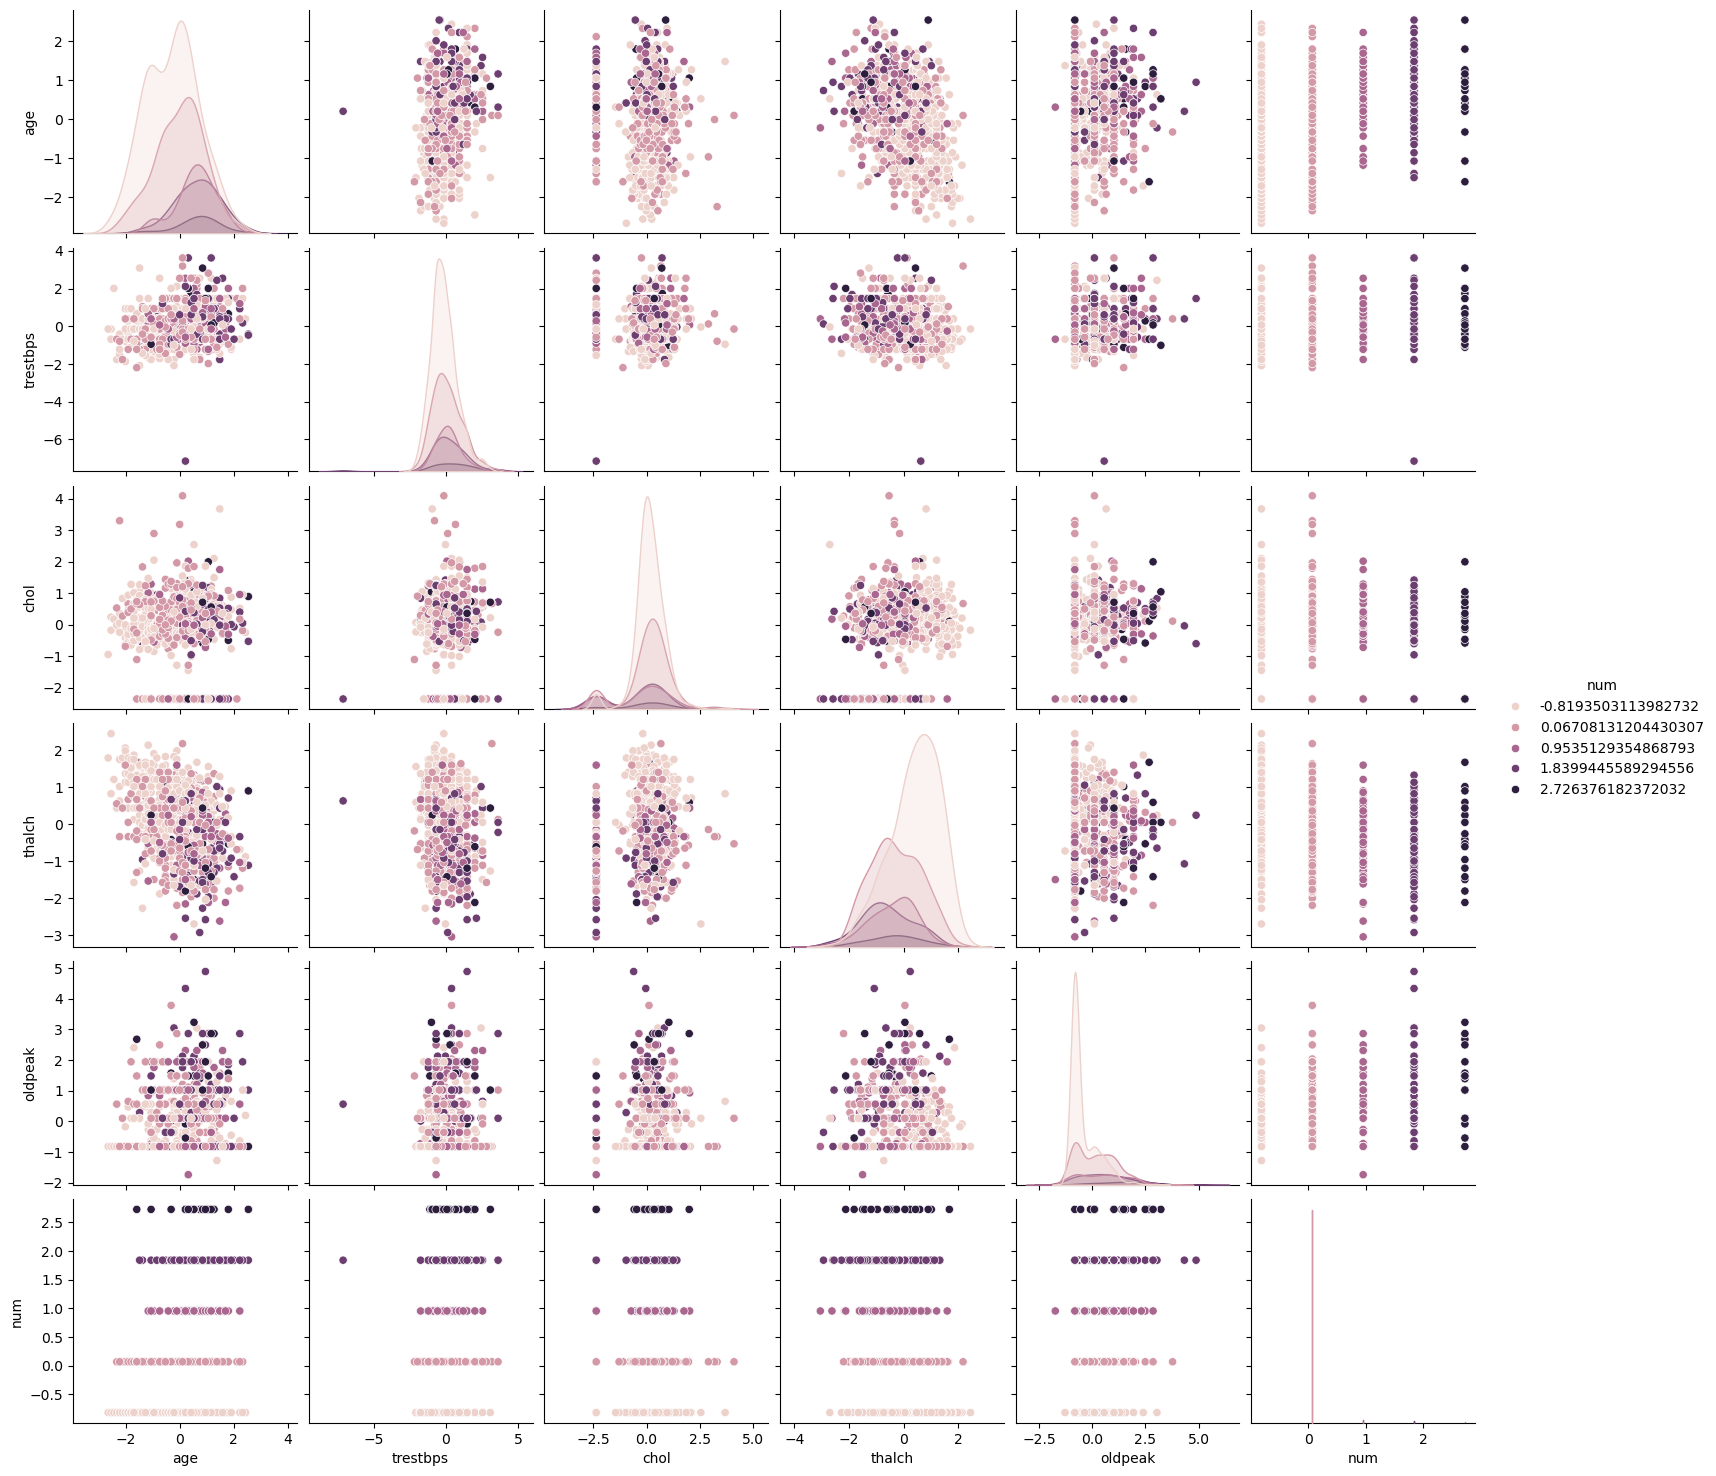

In [14]:
sns.pairplot(df_clean_scaled, vars=numerical_columns, hue='num')

Next look at whether data is balanced.

Text(0.5, 1.0, 'Outcome (num) counts')

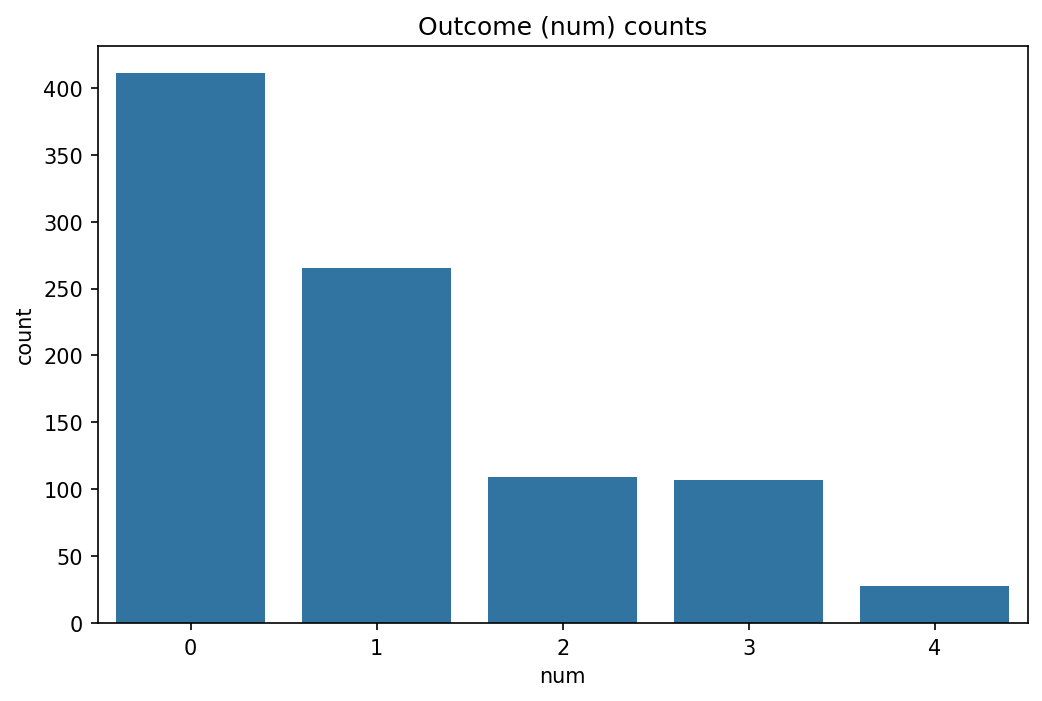

In [15]:
plt.figure(figsize=(8, 5), dpi=150)
sns.countplot(df,x ="num")
plt.title('Outcome (num) counts')

In [12]:
# Train-Test-Split & Scaling
X = df_clean.drop(columns=["num"],axis=1)
y = df_clean["num"]   

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#numerical scaling
numerical_features = ["age","trestbps","chol","fbs","thalch","oldpeak"]
X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#One hot encoder 
ohe = OneHotEncoder(sparse_output=False,drop="first")
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

X_train_cat_encoded = ohe.fit_transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

#transform
X_train_transformed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_transformed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

In [ ]:
X_train_transformed.to_csv('data/X_train_transformed.csv')
X_test_transformed.to_csv('data/X_test_transformed.csv')
y_train.to_csv('data/y_train.csv')
y_test.to_csv('data/y_test.csv')

In [ ]:
X = df_clean.drop(columns=['num'])  # Assuming 'num' is the target variable
y = df_clean['num']



# Fitting and transforming the design matrix
X_encoded = column_transformer.fit_transform(X)

# Displaying the shape of the transformed matrix
X_encoded_shape = X_encoded.shape
X_encoded_shape

In [ ]:
X_encoded

In [ ]:
X_inverse_transformed = column_transformer.inverse_transform(X_encoded)
X_inverse_transformed